In [1]:
import numpy as np
import os
import sys
from glob import glob
import numpy as np
import pandas as pd
# import wfdb
# import biosignalsnotebooks as bsnb
# from wfdb import processing
from matplotlib import pyplot as plt
# from scipy import signal
# from biosppy.signals import ecg
np.set_printoptions(threshold=sys.maxsize)
# import umap
import sklearn.utils as slu
# from sklearn.model_selection import LeaveOneOut
import seaborn as sns
from sklearn.metrics import *

In [2]:
path = '/content/drive/MyDrive/ecg/'

In [3]:
def synthetic_data(file_name):
    path = '/content/drive/MyDrive/ecg/synthetic_data/' + file_name
    file_list = glob(path + '/*.csv')
    data = []
    # labels = np.full((960,1),label)
    labels = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0,8.0]
    for i in range(len(file_list)):
      arr = np.genfromtxt(file_list[i], delimiter=',')
      lbl = np.full((arr.shape[0],1),labels[i])
      arr = np.hstack((arr,lbl))
      data.append( arr )
    all_data = np.concatenate(data, axis=0)
    return all_data

In [4]:
cnn_vae = synthetic_data('conv_vae')
cnn_sparse_vae = synthetic_data('sparse_conv_vae')
lstm_vae = synthetic_data('lstm_vae')
lstm_sparse_vae = synthetic_data('lstm_sparse_vae')

print(cnn_vae.shape)
print(cnn_sparse_vae.shape)
print(lstm_vae.shape)
print(lstm_sparse_vae.shape)

(47616, 257)
(47616, 257)
(47616, 257)
(47616, 257)


In [19]:
comb = 'synthetic_data/combined/'
if not os.path.exists(path + comb):
  os.makedirs(path + comb)

In [20]:
np.savetxt(path + comb + 'cnn_synth.csv', cnn_vae, delimiter=',')
np.savetxt(path + comb + 'cnn_sparse_synth.csv', cnn_sparse_vae, delimiter=',')
np.savetxt(path + comb + 'lstm_synth.csv', lstm_vae, delimiter=',')
np.savetxt(path + comb + 'lstm_sparse_synth.csv', lstm_sparse_vae, delimiter=',')

## Mixing real and synthetic beats

In [7]:
# mlii = np.loadtxt(path+'train_unsampled_mlii/mlii.csv', delimiter=',')
# print(mlii.shape)
# np.random.shuffle(mlii)

In [8]:
# anno = mlii[:,-3]
# normal = mlii[anno == 1.0]
# lbbb = mlii[anno == 2.0]
# rbbb = mlii[anno == 3.0]
# apb = mlii[anno == 4.0]
# pvc = mlii[anno == 5.0]
# fvn = mlii[anno == 6.0]
# fpn = mlii[anno == 7.0]
# paced = mlii[anno == 8.0]

# abnormal = [lbbb,rbbb,apb,pvc,fvn,fpn,paced]
# list_len = [len(i) for i in abnormal]
# print(list_len)
# print(len(normal))
# all_classes = [normal,lbbb,rbbb,apb,pvc,fvn,fpn,paced]

# num_of_vals = np.mean(list_len, dtype=int)
# print(num_of_vals)

In [9]:
# def downsample(arr,n,seed):
#     downsampled = slu.resample(arr,replace=False,n_samples=n,random_state=seed)
#     return downsampled

In [10]:
# sampled_data = []
# for i in all_classes:
#   # print(i.shape[0])
#   if i.shape[0] > num_of_vals//2:
#       i = downsample(i, num_of_vals//2,42)
#   sampled_data.append(i)

# print(len(sampled_data))

In [11]:
# # deleting patient no. and channel no.
# sampled_data_new = []
# for i in sampled_data:
#   i = np.delete(i, [-1,-2],axis=1)
#   sampled_data_new.append(i)

# print(sampled_data_new[0].shape)

In [12]:
# synth_model = cnn_vae

In [13]:
# anno = synth_model[:,-1]
# normal_synth = synth_model[anno == 1.0]
# lbbb_synth = synth_model[anno == 2.0]
# rbbb_synth = synth_model[anno == 3.0]
# apb_synth = synth_model[anno == 4.0]
# pvc_synth = synth_model[anno == 5.0]
# fvn_synth = synth_model[anno == 6.0]
# fpn_synth = synth_model[anno == 7.0]
# paced_synth = synth_model[anno == 8.0]

# all_classes_synth = [normal_synth,lbbb_synth,rbbb_synth,apb_synth,pvc_synth,fvn_synth,fpn_synth,paced_synth]

In [14]:
# print(all_classes_synth[0].shape)

In [15]:
# synth_real_data = []
# for i in range(len(sampled_data_new)):
#   diff = num_of_vals - sampled_data_new[i].shape[0]
#   print(diff)
#   synth_samps = all_classes_synth[i][np.random.choice(all_classes_synth[i].shape[0], diff, replace=False),:]
#   print(synth_samps.shape)
#   # synth_samps = all_classes_synth[i][:diff]
#   sampled_data[i] = np.concatenate((sampled_data_new[i], synth_samps))
#   print(sampled_data[i].shape)
#   synth_real_data.append(sampled_data[i])

# print(len(synth_real_data))

In [16]:
# synth_real_arr = np.concatenate(synth_real_data, axis=0)
# np.random.shuffle(synth_real_arr)
# print(synth_real_arr.shape)

In [17]:
# mixed = 'synthetic_data/mixed/'
# if not os.path.exists(path + mixed):
#   os.makedirs(path + mixed)

In [18]:
# np.savetxt(path + mixed + 'cnn_vae_mixed.csv', synth_real_arr, delimiter=',' )

## Visualise Synthetic Beats

In [21]:
comb = path + 'synthetic_data/combined/'
cnn_synth = np.genfromtxt(comb + 'cnn_synth.csv', delimiter=',')
cnn_sparse_synth = np.genfromtxt(comb + 'cnn_sparse_synth.csv', delimiter=',' )
lstm_synth = np.genfromtxt(comb + 'lstm_synth.csv', delimiter=',')
lstm_sparse_synth = np.genfromtxt(comb + 'lstm_sparse_synth.csv', delimiter=',')

print(cnn_synth.shape)
print(cnn_sparse_synth.shape)
print(lstm_synth.shape)
print(lstm_sparse_synth.shape)


(47616, 257)
(47616, 257)
(47616, 257)
(47616, 257)


In [42]:
def view_sample(model_file, beat_type, beat_no, model_name):
  beats = model_file[:,:-1]
  labels = model_file[:,-1]
  view_data = beats[np.where(labels == beat_type)[0]][beat_no]
  plt.plot(view_data)
  plt.title(model_name + ' Synthetic Beat Type: %s' % str(beat_type))
  plt.show();


In [44]:
def view_beat_per_class(model_file, beat_no, model_name):
  beat_types = [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0]
  for i in beat_types:
    view_sample(model_file, i, beat_no, model_name)

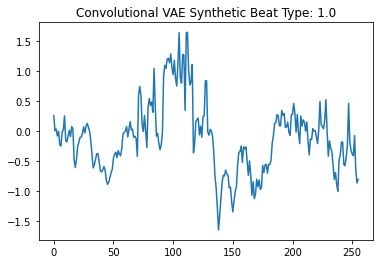

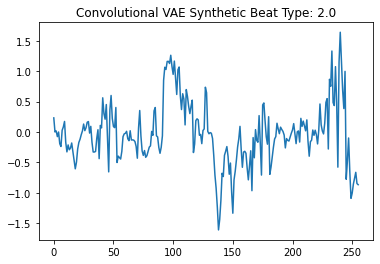

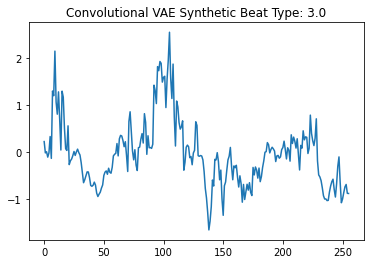

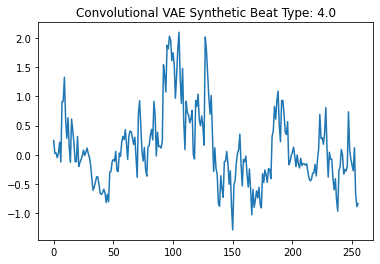

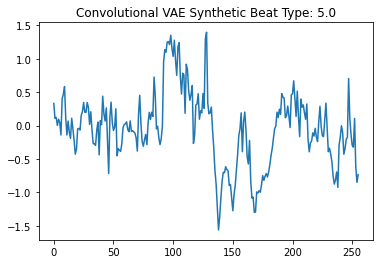

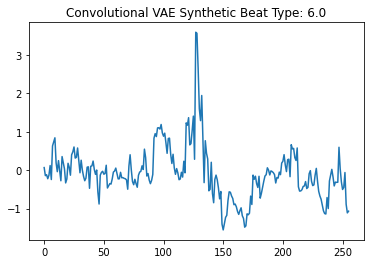

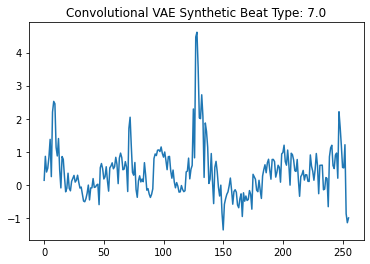

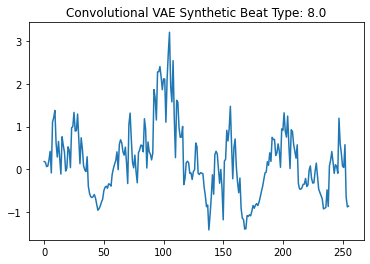

In [48]:
view_beat_per_class(cnn_synth, 50, "Convolutional VAE")

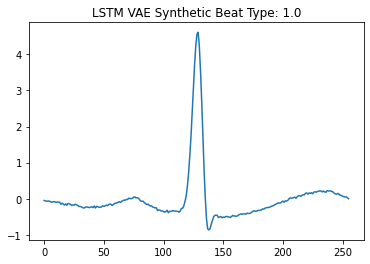

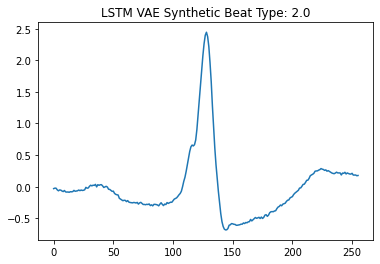

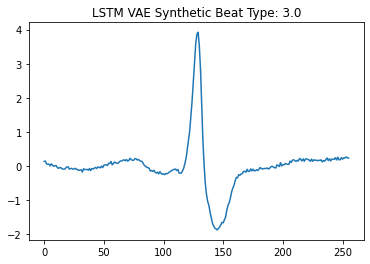

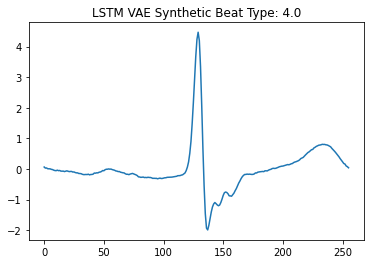

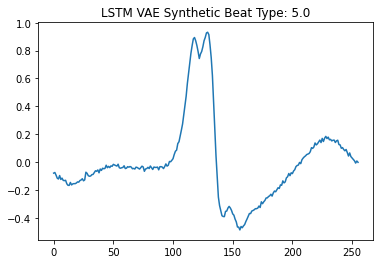

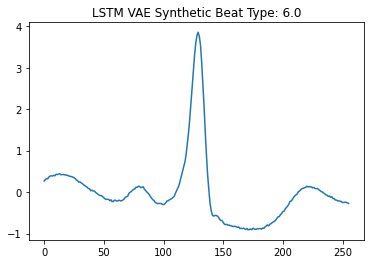

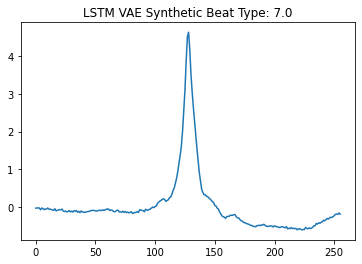

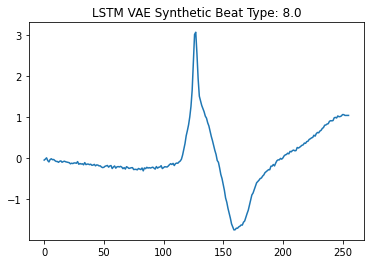

In [49]:
view_beat_per_class(lstm_synth, 50, "LSTM VAE")

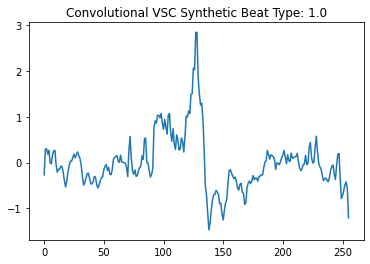

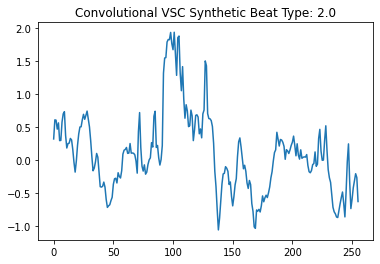

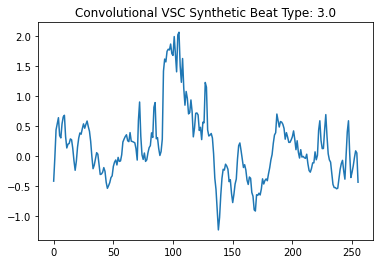

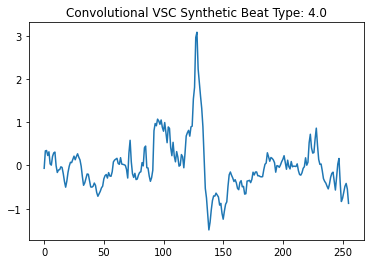

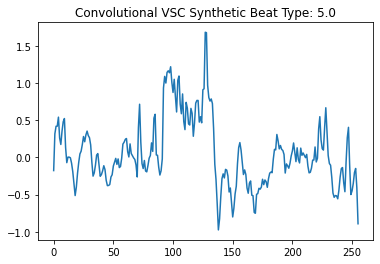

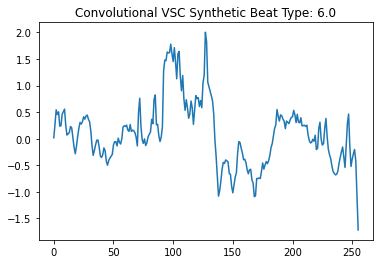

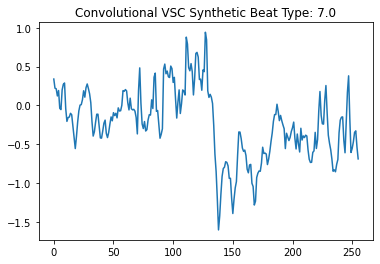

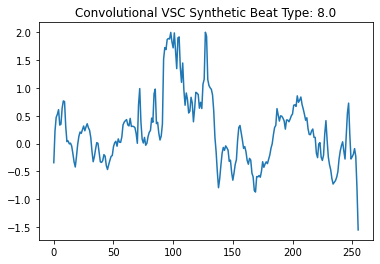

In [50]:
view_beat_per_class(cnn_sparse_synth, 50, "Convolutional VSC")

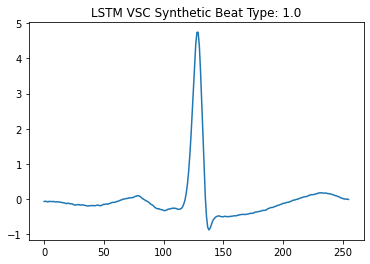

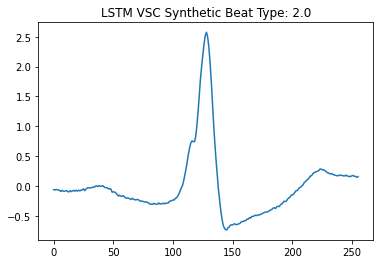

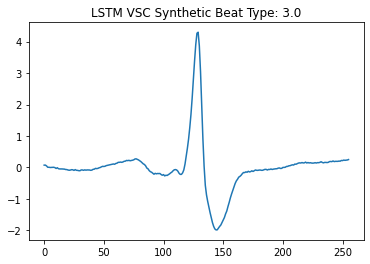

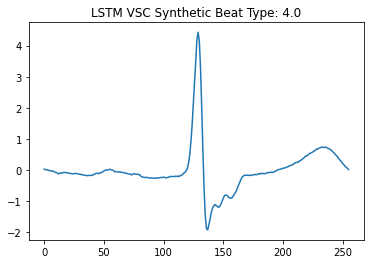

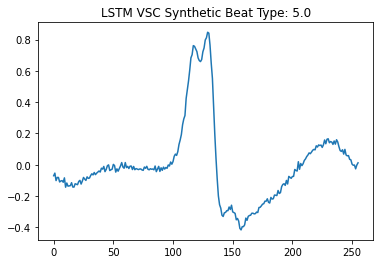

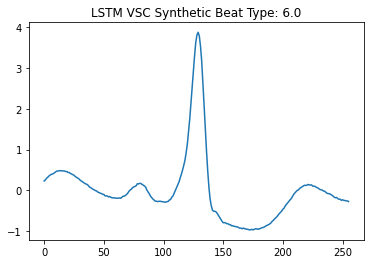

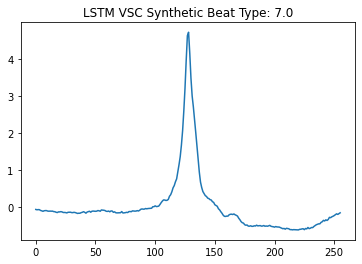

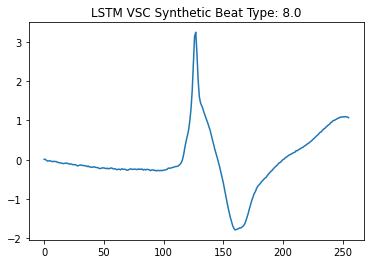

In [51]:
view_beat_per_class(lstm_sparse_synth, 50, "LSTM VSC")